# Assignment 3

## Part one

In [182]:
import pandas as pd

# reading in the data as a pandas dataframe
df_contracts = pd.read_csv("./nba_contracts_history.csv")
df_contracts.head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0


### Evolution Chart

In [183]:
# adding a new salary-column containing the salary in millions for easier interpretation
df_contracts["AVG_SALARY_MILLIONS"] = df_contracts["AVG_SALARY"]/1000000
df_contracts.head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,AVG_SALARY_MILLIONS
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0,2.564753
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0,21.165675
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0,10.759764
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0,8.143323
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0,13.410739


In [184]:
# creating a new dataframe, grouped by the year the contract started, that includes the average salary of contracts given out in that year
avg = df_contracts.groupby("CONTRACT_START")["AVG_SALARY_MILLIONS"].mean().reset_index()
display(avg)

,CONTRACT_START,AVG_SALARY_MILLIONS
0,2011,10.857031
1,2012,10.627476
2,2013,11.434461
3,2014,8.769931
4,2015,12.609998
5,2016,13.829159
6,2017,12.323803
7,2018,7.369396
8,2019,4.421780


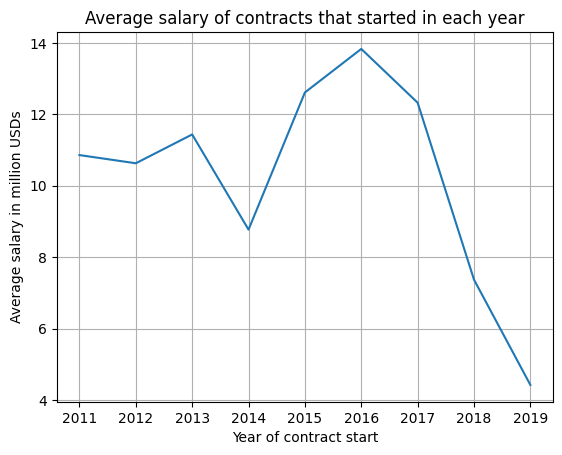

In [185]:
# creating a line plot that plots the evolution of players' salary
import matplotlib.pyplot as plt

# plotting the year the contract started on the x-axis and the average salary of all players' who signed contracts in that year on the y-axis
plt.plot(avg["CONTRACT_START"], avg["AVG_SALARY_MILLIONS"])

# adding a grid
plt.grid()

# adding a title and labels for the axes
plt.title("Average salary of contracts that started in each year")
plt.xlabel("Year of contract start")
plt.ylabel("Average salary in million USDs")

plt.show()

### Distribution Chart

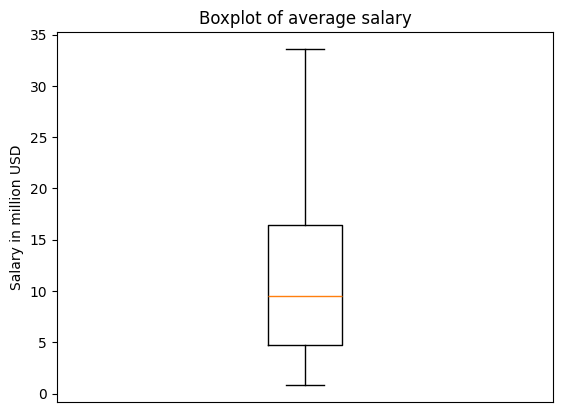

In [186]:
# boxplot to visualize the distribution of earnings
plt.boxplot(df_contracts["AVG_SALARY_MILLIONS"])

# adding title and a label for y-axis, removing the ticks on the x-axis
plt.title("Boxplot of average salary")
plt.xticks([])
plt.ylabel("Salary in million USD")

plt.show()

### Correlation chart

In [187]:
# adding a points-per-game-column, since it is a more common measure for evaluating players' scoring
df_contracts["PPG"] = df_contracts["PTS"] / 82
df_contracts.head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,DREB,REB,AST,TOV,STL,BLK,PF,+/-,AVG_SALARY_MILLIONS,PPG
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0,2.564753,10.243902
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0,21.165675,15.073171
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0,10.759764,6.902439
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0,8.143323,15.341463
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0,13.410739,16.426829


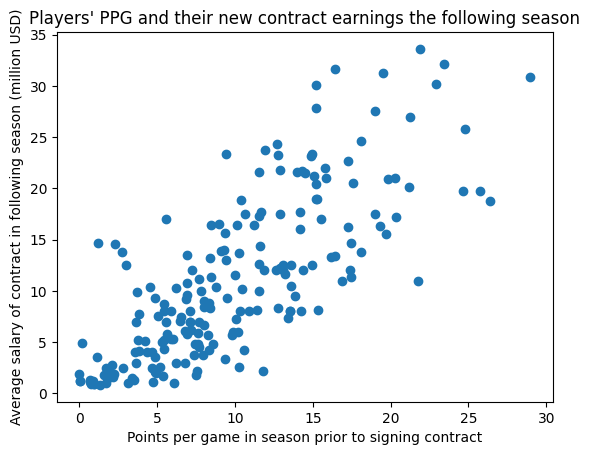

In [188]:
# creating a scatterplot to visualize the correlation between players' scoring and the contract they signed in the season following
plt.scatter(df_contracts["PPG"], df_contracts["AVG_SALARY_MILLIONS"])

# adding title and labels for the axes
plt.title("Players' PPG and their new contract earnings the following season")
plt.xlabel("Points per game in season prior to signing contract")
plt.ylabel("Average salary of contract in following season (million USD)")

plt.show()

## Part two

In [189]:
# reading in the data
df_netflix = pd.read_csv("./netflix.csv")
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Part of a whole chart

In [190]:
# counting the values of every release year and getting the number of rows
year_counts = df_netflix['release_year'].value_counts()
total_movies = df_netflix.shape[0]

# calculating percentage for each year
year_percentages = (year_counts / total_movies) * 100

# creating a new dataframe
percentage_df = pd.DataFrame(year_percentages).reset_index()
# only selecting the wanted columns
percentage_df.columns = ["release_year", "percentage"]
# sorting the dataframe by release year
percentage_df = percentage_df.sort_values(by="release_year")

# setting release year as the index for plot creation
percentage_df.set_index("release_year", inplace=True)

percentage_df.head()

,percentage
release_year,
1925,0.011355
1942,0.022709
1943,0.034064
1944,0.034064
1945,0.045418


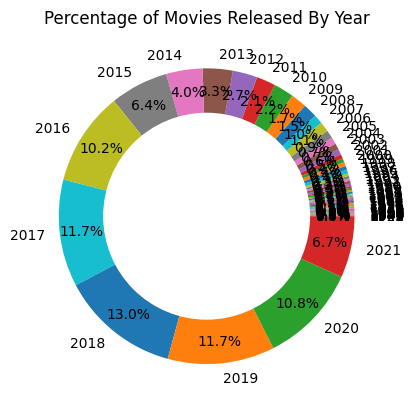

In [196]:
# creating the pie chart
plt.pie(percentage_df["percentage"], labels=percentage_df.index,
        autopct='%1.1f%%', pctdistance=0.85)
 
# drawing the circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# adding a circle to the pie chart to make it a doughnut chart
fig.gca().add_artist(centre_circle)
 
# adding a title
plt.title("Percentage of Movies Released By Year")
 
# showing chart
plt.show()

### Map chart

In [ ]:
# counting all the rows for each value in the country-column and only taking the top-15
country_counts = df_netflix["country"].value_counts()
country_counts = country_counts[:15]

# putting the counts in a dataframe and resetting the index
country_counts_df = pd.DataFrame(country_counts).reset_index()

# changing the value of "USA" to "United States of America" for automatic recognition by the map
country_counts_df.iloc[0,0] = "United States of America"

display(country_counts_df)

,country,count
0,United States of America,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


C:\Users\hausb\AppData\Local\Temp\ipykernel_29204\1591676285.py:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



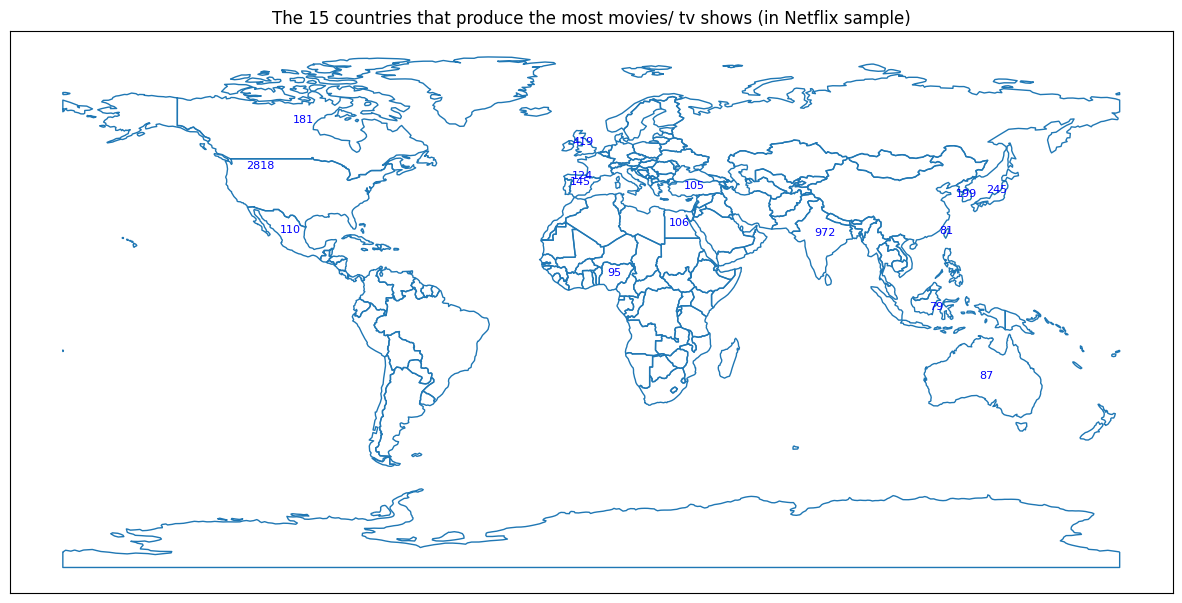

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# loading the world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# merging dataframe with the world map
world = world.merge(country_counts_df, how="left", left_on="name", right_on="country")

# plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)

# adding text for each country showing the number of movies/shows for each country on the map
for idx, row in world.iterrows():
    if pd.notna(row["count"]):
        plt.annotate(text=int(row["count"]), xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
                     horizontalalignment="center", fontsize=8, color="blue")

# adding a title
plt.title("The 15 countries that produce the most movies/ tv shows (in Netflix sample)")

# removing the ticks on the axes
plt.xticks([])
plt.yticks([])

plt.show()

### Flow chart

In [ ]:
# filtering out rows that do not contain a director or a title and shortening the df to 50 rows
df_netflix2 = df_netflix[df_netflix["director"].notna()]
df_netflix2 = df_netflix[df_netflix["title"].notna()]
df_netflix2 = df_netflix[:50]
df_netflix2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


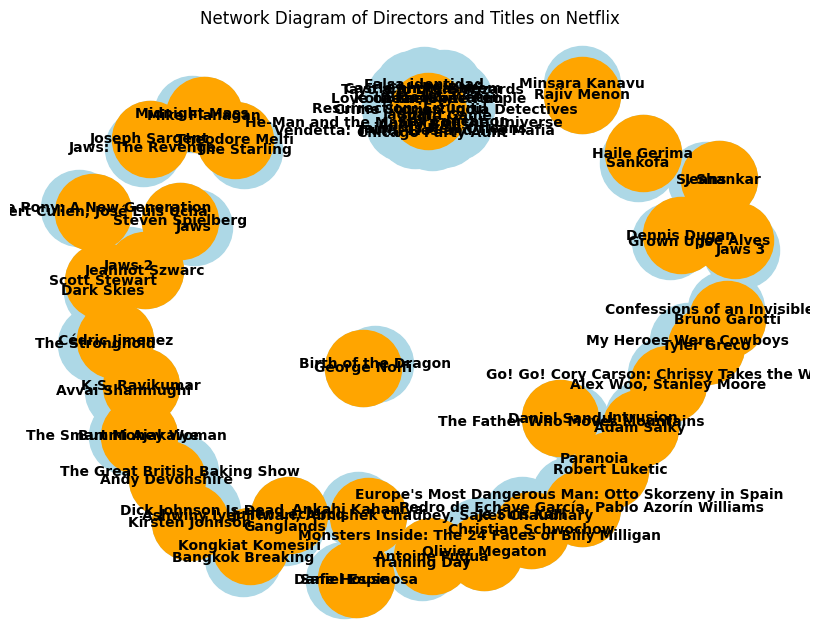

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# creating the graph
G = nx.Graph()

# adding edges to the graph
for i, row in df_netflix2.iterrows():
    G.add_edge(row['director'], row['title'])

# ensuring all nodes are added, including isolated nodes
all_nodes = set(df_netflix2['director']).union(set(df_netflix2['title']))
G.add_nodes_from(all_nodes)

# generating positions for all nodes
pos = nx.spring_layout(G)

# drawing the network diagram
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, edge_color='gray', font_size=10, font_weight='bold')

# highlighting directors with a different color
director_nodes = df_netflix2['director'].unique()
nx.draw_networkx_nodes(G, pos, nodelist=director_nodes, node_color='orange', node_size=3000)

plt.title('Network Diagram of Directors and Titles on Netflix')
plt.show()

## Bonus part

In [ ]:
# reading in the dataset
import pandas as pd
df_gdp = pd.read_excel("./GDP_Data.xls", index_col=False)
df_gdp.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,2024-05-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03,2023.0
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
4,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.796905e+11,8.992556e+11,8.297383e+11,9.399593e+11,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12,NaN


In [ ]:
# setting new column names
df_gdp.columns = df_gdp.iloc[2]

# resetting the index while deleting the old one
df_gdp = df_gdp.reset_index(drop=True)

# dropping unnecessary rows
df_gdp = df_gdp.drop([0,1,2])

df_gdp.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
4,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.796905e+11,8.992556e+11,8.297383e+11,9.399593e+11,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12,NaN
5,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN
6,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,...,8.945050e+11,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11,NaN
7,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359668e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11,NaN


In [ ]:
# dropping unnecessary columns
df_gdp = df_gdp.drop(df_gdp.columns[[1,2,3]], axis=1)
df_gdp.head()

2,Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
3,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
4,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.796905e+11,8.992556e+11,8.297383e+11,9.399593e+11,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12,NaN
5,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN
6,Africa Western and Central,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,1.584558e+10,1.442849e+10,1.488050e+10,...,8.945050e+11,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11,NaN
7,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359668e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11,NaN


In [ ]:
# importing all countries as a string to compare with dataset
countries = """
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Deps
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Central African Rep
Chad
Chile
China
Colombia
Comoros
Congo
Congo {Democratic Rep}
Costa Rica
Croatia
Cuba
Curaçao
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland {Republic}
Israel
Italy
Ivory Coast
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Korea North
Korea South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Macedonia
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Mauritania
Mauritius
Mexico
Micronesia
Moldova
Monaco
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nauru
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
Norway
Oman
Pakistan
Palau
Palestine
Panama
Papua New Guinea
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russian Federation
Rwanda
St Kitts & Nevis
St Lucia
Saint Vincent & the Grenadines
Samoa
San Marino
Sao Tome & Principe
Saudi Arabia
Senegal
Serbia
Seychelles
Sierra Leone
Singapore
Slovakia
Slovenia
Solomon Islands
Somalia
South Africa
South Sudan
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Syria
Taiwan
Tajikistan
Tanzania
Thailand
Togo
Tonga
Trinidad & Tobago
Tunisia
Turkey
Turkmenistan
Tuvalu
Uganda
Ukraine
United Arab Emirates
United Kingdom
United States
Uruguay
Uzbekistan
Vanuatu
Vatican City
Venezuela
Vietnam
Yemen
Zambia
Zimbabwe
"""

# converting this string to a list
countries = countries.splitlines()

In [ ]:
# getting the indices of all rows of which the country name is in the list of valid countries
indices_to_keep = df_gdp.index[df_gdp["Country Name"].isin(countries)].tolist()

# only keeping the rows with these indices
df_filtered = df_gdp.loc[indices_to_keep]

df_filtered.head()

2,Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
3,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
5,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN
7,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359668e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11,NaN
8,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.322815e+10,1.138685e+10,1.186120e+10,1.301973e+10,1.515642e+10,1.540183e+10,1.516273e+10,1.793057e+10,1.891638e+10,NaN
9,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.271686e+09,2.789883e+09,2.896612e+09,3.000160e+09,3.218419e+09,3.155150e+09,2.891002e+09,3.325144e+09,3.352031e+09,NaN


In [ ]:
# converting DataFrame from wide to long format for plot creation
df_long = df_filtered.melt(id_vars="Country Name", var_name="Year", value_name="GDP")

# converting "Year" to integer type for sorting purposes
df_long["Year"] = df_long["Year"].astype(int)

# sorting by Year ascendingly and GDP descendingly
df_long = df_long.sort_values(["Year", "GDP"], ascending=[True, False])

df_long.head()

,Country Name,Year,GDP
154,United States,1960,5.433000e+11
49,United Kingdom,1960,7.323397e+10
47,France,1960,6.222548e+10
27,China,1960,5.971625e+10
71,Japan,1960,4.430734e+10


In [ ]:
# only keeping the countries with top 10 GDP-values for every year
df_long_top10 = df_long.groupby("Year").apply(lambda x: x.nlargest(10, "GDP")).reset_index(drop=True)
df_long_top10.head()

C:\Users\hausb\AppData\Local\Temp\ipykernel_9672\1222195313.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Country Name,Year,GDP
0,United States,1960,5.433000e+11
1,United Kingdom,1960,7.323397e+10
2,France,1960,6.222548e+10
3,China,1960,5.971625e+10
4,Japan,1960,4.430734e+10


In [ ]:
import plotly.express as px

# creating the bar chart race animation with a title
fig = px.bar(df_long_top10, 
             x="GDP", 
             y="Country Name", 
             animation_frame="Year", 
             animation_group="Country Name",
             range_x=[0, df_long["GDP"].max() + 10],
             title="Top 10 Countries by GDP from 1960 to 2023",
             labels={"GDP": "GDP (in Trillions USD)", "Country Name": "Country Name"})

# customizing the layout with axes titles
fig.update_layout(
    xaxis_title="GDP (in Trillions USD)",
    yaxis_title="Country",
    yaxis=dict(autorange="reversed")
)

# showing the figure
fig.show()

# saving the animation as a HTML file
fig.write_html("gdp_bar_chart_race.html")